In [439]:
import DatasetPrepare
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [440]:
# get Envi dataset
df = pd.DataFrame(DatasetPrepare.getEnviDatasets())

In [441]:
# mape function
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

In [442]:
# add target by shift Envi column
observation = 35

for i in range(1, observation + 2):
    if(i == observation + 1):
        df['y'] = df['Envi'].shift(int(i) * -1)
        break

    df['x' + str(i)] = df['Envi'].shift(int(i) * -1)

df = df.drop(df.tail(observation + 1).index)

# add baseline from average observation
col = df.loc[: , "x1":"x" + str(observation)]
df['baseline_pred'] = col.mean(axis=1)

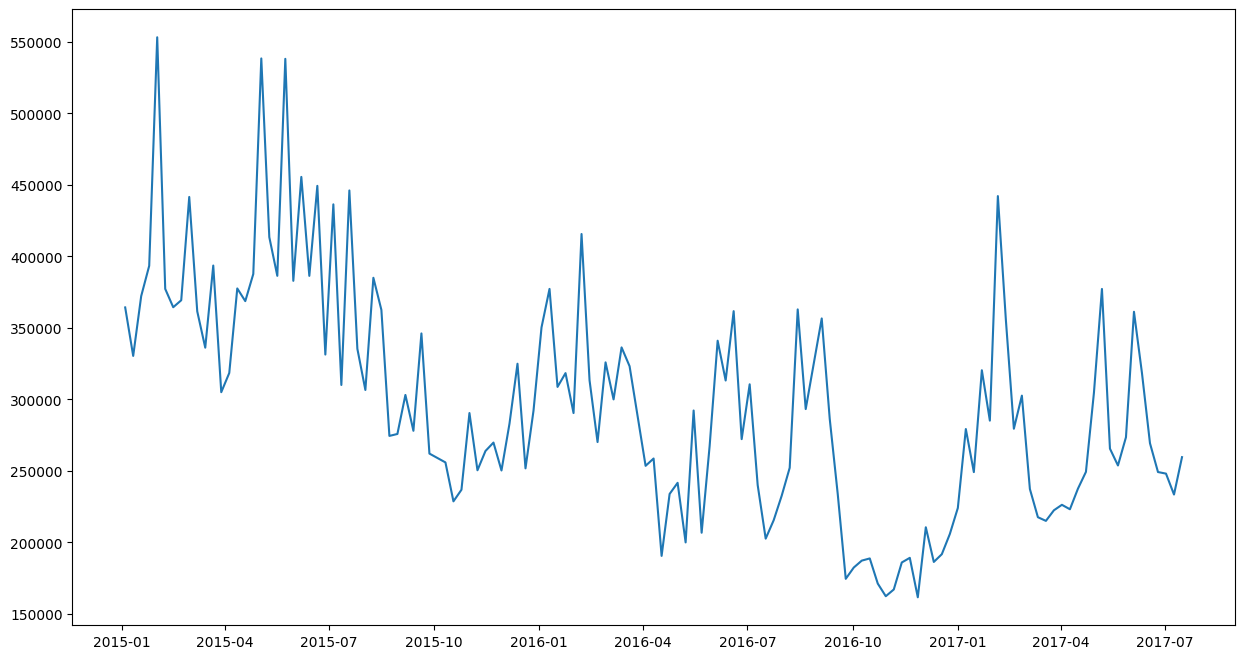

In [443]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.plot(df.index, df['Envi'])
plt.show()

In [444]:
#split train test
X = df.loc[: , "Envi":"x" + str(observation)].values
y = df['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [445]:
# implement random forest regression
from sklearn.ensemble import RandomForestRegressor

randomForest=RandomForestRegressor()

randomForest.fit(X_train,y_train)

ran_pred = randomForest.predict(X_test)

random_mae = mean_absolute_error(y_test, ran_pred)
random_mse = mean_squared_error(y_test, ran_pred)
random_r2 = r2_score(y_test, ran_pred)
random_mape = mape(y_test, ran_pred)

In [446]:
# implement Gradient boosting regression
from sklearn.ensemble import GradientBoostingRegressor

gradientBoosting=GradientBoostingRegressor()

gradientBoosting.fit(X_train,y_train)

gradient_pred = gradientBoosting.predict(X_test)

gradient_mae = mean_absolute_error(y_test, gradient_pred)
gradient_mse = mean_squared_error(y_test, gradient_pred)
gradient_r2 = r2_score(y_test, gradient_pred)
gradient_mape = mape(y_test, gradient_pred)


In [447]:
# implement AdaBoost regression
from sklearn.ensemble import AdaBoostRegressor
adaBoost=AdaBoostRegressor()

adaBoost.fit(X_train,y_train)

ada_pred = adaBoost.predict(X_test)

ada_mae = mean_absolute_error(y_test, ada_pred)
ada_mse = mean_squared_error(y_test, ada_pred)
ada_r2 = r2_score(y_test, ada_pred)
ada_mape = mape(y_test, ada_pred)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


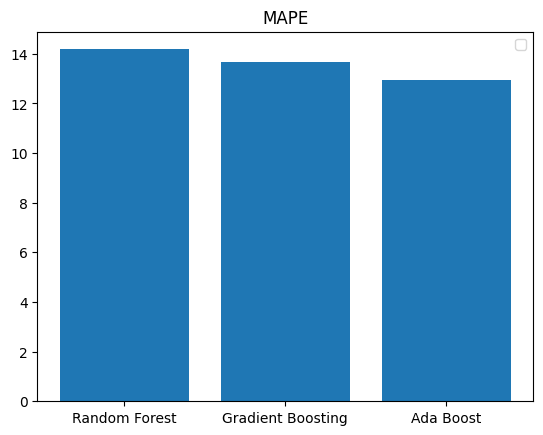

In [448]:
x = np.array(["Random Forest", "Gradient Boosting", "Ada Boost"])
y = np.array([random_mape, gradient_mape, ada_mape])

plt.bar(x,y)
plt.title('MAPE')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


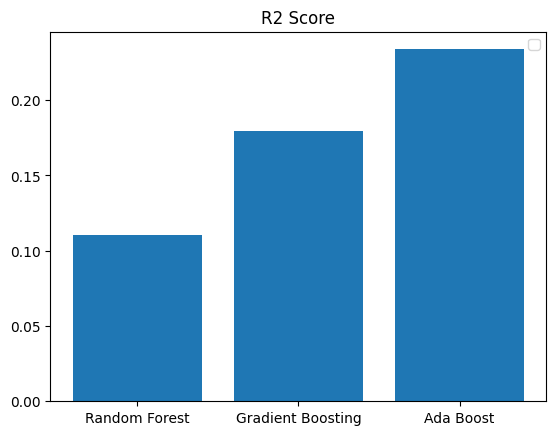

In [449]:
x = np.array(["Random Forest", "Gradient Boosting", "Ada Boost"])
y = np.array([random_r2, gradient_r2, ada_r2])

plt.bar(x,y)
plt.title('R2 Score')
plt.legend()
plt.show()